<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/9.%20CNN%20%26%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.6.0


In [2]:
#Get data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-29 18:13:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   183MB/s    in 0.6s    

2021-08-29 18:13:53 (183 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [5]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


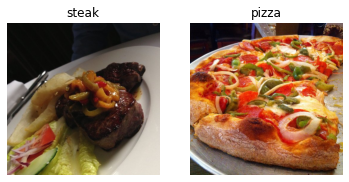

In [8]:
# visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [11]:
# prepare the data

# set path
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

In [10]:
# create train and validation data generator and rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

In [17]:
# load in data and turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=5)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=5)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# get a sample
images, labels = train_data.next() 
len(images), len(labels)

(32, 32)

In [19]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [21]:
# create a model

model = tf.keras.Sequential()
model.add(Conv2D(filters=10, 
                 kernel_size=3, 
                 padding="valid",
                 activation="relu",
                 input_shape=(224,224,3)))

model.add(Conv2D(10, 3, activation="relu"))
model.add(Conv2D(10, 3, activation="relu"))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=Adam(),
              metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit the model
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 254ms/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 0.5323 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 12s 254ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.5673 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6285 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 6.1401e-04 - accuracy: 1.0000 - val_loss: 0.6613 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 4.2429e-04 - accuracy: 1.0000 - val_loss: 0.6757 - val_accuracy: 0.8180


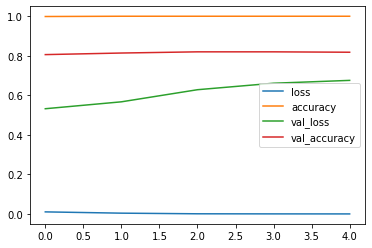

In [25]:
# evaluation
pd.DataFrame(history.history).plot()

In [33]:
# ways to induce overfitting:
# increase # conv layers
# increase # conv filters
# add another dense layer to the output of our flattened layer

# ways to reduce overfitting:
# data augmentation
# add regularization layers (MaxPoll2D)
# add more data

In [26]:
model2 = tf.keras.Sequential()
model2.add(Conv2D(filters=10, 
                 kernel_size=3, 
                 padding="valid",
                 activation="relu",
                 input_shape=(224,224,3)))
model2.add(MaxPool2D(pool_size=2))
model2.add(Conv2D(10, 3, activation="relu"))
model2.add(MaxPool2D())
model2.add(Conv2D(10, 3, activation="relu"))
model2.add(MaxPool2D())
model2.add(Flatten())
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=Adam(),
              metrics=["accuracy"])

In [27]:
# fit the model
history2 = model2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6215 - accuracy: 0.6453 - val_loss: 0.4961 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4774 - accuracy: 0.7913 - val_loss: 0.4177 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4458 - accuracy: 0.8053 - val_loss: 0.3792 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4181 - accuracy: 0.8167 - val_loss: 0.3762 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4120 - accuracy: 0.8160 - val_loss: 0.3646 - val_accuracy: 0.8480


In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

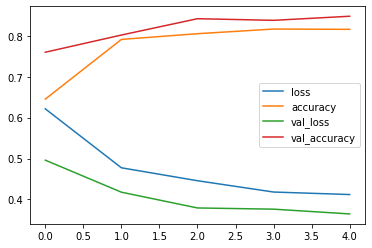

In [30]:
pd.DataFrame(history2.history).plot()

In [40]:
# add data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [43]:
# load in data and turn into batches

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=5)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=5)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [45]:
model3 = tf.keras.Sequential()
model3.add(Conv2D(filters=10, 
                 kernel_size=3, 
                 padding="valid",
                 activation="relu",
                 input_shape=(224,224,3)))
model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(10, 3, activation="relu"))
model3.add(MaxPool2D())
model3.add(Conv2D(10, 3, activation="relu"))
model3.add(MaxPool2D())
model3.add(Flatten())
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=Adam(),
              metrics=["accuracy"])

In [46]:
# fit the model
history3 = model3.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6396 - accuracy: 0.6193 - val_loss: 0.5498 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5385 - accuracy: 0.7380 - val_loss: 0.4241 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 26s 548ms/step - loss: 0.5236 - accuracy: 0.7547 - val_loss: 0.3884 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 26s 549ms/step - loss: 0.4887 - accuracy: 0.7713 - val_loss: 0.3698 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4951 - accuracy: 0.7847 - val_loss: 0.4157 - val_accuracy: 0.8260


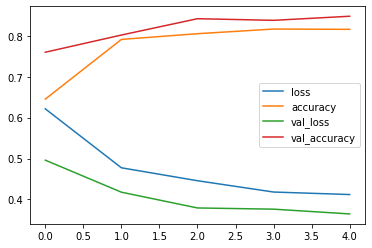

In [47]:
pd.DataFrame(history2.history).plot()

In [48]:
# predict on our own data
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-08-29 19:26:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-08-29 19:26:57 (33.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [51]:
steak = mpimg.imread("03-steak.jpeg")

In [53]:
steak.shape

(4032, 3024, 3)

In [55]:
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [64]:
# custome load function
def load_and_prep_image(filename, image_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size=[image_shape, image_shape])

  img = img/255.

  return img

In [65]:
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [67]:
model3.predict(tf.expand_dims(steak,axis=0))

array([[0.810548]], dtype=float32)